# 데이터전처리의 방법(학습 목표)
### 1. 확보한 자료에서 파생되는 변수를 어떻게 만들까하는 로직을 생각(로직을 최소단위로 decompose)
### 2. 사칙연산과 반복문과 조건문을 고려하여 구현해보고(자료의 데이터 형태를 확인하면서)
### 3. 되도록이면 파이썬에 내장된 함수를 활용(여러분이 상상하는 로직은 모두 이미 구현이 되어 있을 것임)
### 4. 구글링을 통해 예제 검색하여 비슷한 코드로 응용하라
### 5. 팀내에서 협의하여 해결하라(master에게 자문)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Kaggle에서 'reddit_wsb.cvs'데이터를 다운로드

In [181]:
df =pd.read_csv('../data/reddit_wsb.csv')
df.head(3)

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35


# 1. 데이터전처리 (pandas tricks!)

## (1) select_dtypes

In [182]:
df.dtypes
df.dtypes.value_counts()

title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
dtype: object

object     5
int64      2
float64    1
dtype: int64

In [183]:
df.select_dtypes(include=['float64', 'int64'])

,score,comms_num,created
0,55,6,1.611863e+09
1,110,23,1.611862e+09
2,0,47,1.611862e+09
3,29,74,1.611862e+09
4,71,156,1.611862e+09
...,...,...,...
39332,24,10,1.614923e+09
39333,6,6,1.614923e+09
39334,82,7,1.614923e+09
39335,107,31,1.614923e+09


## (2) copy

In [184]:
df1 = pd.DataFrame({ 'a':[0,0,0], 'b': [1,1,1]})
df1
df2 = df1
df2['a'] = df2['a'] + 1
df1

,a,b
0,0,1
1,0,1
2,0,1


,a,b
0,1,1
1,1,1
2,1,1


because df2 = df1 is not making a copy of df1 and assign it to df2, but setting up a pointer pointing to df1. So any changes in df2 would result in changes in df1. To fix this, you can do either

- from copy import deepcopy
- df2 = deepcopy(df1)

In [185]:
df1 = pd.DataFrame({ 'a':[0,0,0], 'b': [1,1,1], 'c':[1,3,2]})
df1
df2 = df1.copy()
df2['a'] = df2['a'] + 1
df1

,a,b,c
0,0,1,1
1,0,1,3
2,0,1,2


,a,b,c
0,0,1,1
1,0,1,3
2,0,1,2


## (3) map
define a dictionary with ‘keys’ being the old values and ‘values’ being the new values.
- easy data transformations

In [186]:
level_map = {1: 'high', 2: 'medium', 3: 'low'}
df1['c_level'] = df1['c'].map(level_map)
df1

,a,b,c,c_level
0,0,1,1,high
1,0,1,3,low
2,0,1,2,medium


## (4) apply

In [187]:
df = pd.DataFrame({ 'c1':[ 'high' ,'high', 'low', 'low'], 'c2': [0, 23, 17, 4]})
df

,c1,c2
0,high,0
1,high,23
2,low,17
3,low,4


In [188]:
def rule(x, y):
    if x == 'high' and y > 10:
         return 1
    else:
         return 0

In [189]:
df['new'] = df.apply(lambda x: rule(x['c1'], x['c2']), axis = 1)
df.head()

,c1,c2,new
0,high,0,0
1,high,23,1
2,low,17,0
3,low,4,0


## (6) number of missing values

In [190]:
df = pd.DataFrame({ 'id': [1,2,3], 'c1':[0,0,np.nan], 'c2': [np.nan,1,1]})
df

,id,c1,c2
0,1,0.0,NaN
1,2,0.0,1.0
2,3,NaN,1.0


In [191]:
df = df[df.columns]
df

,id,c1,c2
0,1,0.0,NaN
1,2,0.0,1.0
2,3,NaN,1.0


In [192]:
df['num_nulls'] = df[['c1', 'c2']].isnull().sum(axis=1)
df.head()

,id,c1,c2,num_nulls
0,1,0.0,NaN,1
1,2,0.0,1.0,0
2,3,NaN,1.0,1


## (5) select rows with specific values of column
In SQL we can do this using SELECT * FROM … WHERE ID in (‘A001’, ‘C022’, …) to get records with specific IDs. If you want to do the same thing with pandas, you can do

In [193]:
df_filter = df['id'].isin([1, 2])
df_filter
df[df_filter]

0     True
1     True
2    False
Name: id, dtype: bool

,id,c1,c2,num_nulls
0,1,0.0,NaN,1
1,2,0.0,1.0,0


# Pandas Ufuncs
- 판다의 내장함수를 이용하여 데이터프레임의 개별 컬럼의 변수를 전처리, 새로운 변수(파생변수)를 생성하는 내용 (효율성과 효과성)
- 참고로 for in 반복문 보다는 파이썬의 내장함수를 사용할 것을 권장(속도 차이)
- 유용한 내장함수 예: ufuncs we will mention are: .diff, .shift, .cumsum, .cumcount, .str commands (works on strings), .dt commands 등등

## (6) 특정컬럼(title)에서 맨 앞의 문자만 컬럼으로 만들 경우 (예, Mr. Nrs. Junior 등)

In [194]:
df =pd.read_csv('../data/reddit_wsb.csv')
df.dropna(inplace=True) # 모든 결측치 제거
df.head(3)

,title,score,id,url,comms_num,created,body,timestamp
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31


title 컬럼에서 글자수가 제일 긴 글자의 수

In [195]:
df.title.str.split(' ').apply(lambda x: len(x)).max()

64

In [196]:
df.title.str.split(' ', expand=True)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
2,Exit,the,system,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,SHORT,STOCK,DOESN'T,HAVE,AN,EXPIRATION,DATE,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,THIS,IS,THE,MOMENT,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10,We,need,to,keep,this,movement,"going,",we,all,can,...,None,None,None,None,None,None,None,None,None,None
12,Once,you're,done,with,GME,-,$AG,and,"$SLV,",the,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39325,My,strategy,to,pressure,naked,calls,to,squeeze,None,None,...,None,None,None,None,None,None,None,None,None,None
39327,Siover,Shorts,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39328,GME,GME,GME,GME,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39329,Latest,Ryan,Cohen,Tweet,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [197]:
df['title'] = df.title.str.split(' ', expand=True)[0]
df

,title,score,id,url,comms_num,created,body,timestamp
2,Exit,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
6,SHORT,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
10,We,222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25
12,Once,0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10
...,...,...,...,...,...,...,...,...
39325,My,4,lxwaif,https://www.reddit.com/r/wallstreetbets/commen...,21,1.614923e+09,"I'm not a financial advisor, I'm just a dude o...",2021-03-05 07:46:14
39327,Siover,0,lxw9t2,https://www.reddit.com/r/wallstreetbets/commen...,1,1.614923e+09,Mike Maloney (youtube) had a guest on the oth...,2021-03-05 07:45:15
39328,GME,60,lxw8mt,https://www.reddit.com/r/wallstreetbets/commen...,16,1.614923e+09,To the moon Lets go.\n\n&#x200B;\n\n&#x200B;\n...,2021-03-05 07:43:43
39329,Latest,12,lxw7qa,https://www.reddit.com/r/wallstreetbets/commen...,14,1.614923e+09,So i went on youtube to find the [pets.com](ht...,2021-03-05 07:42:36


## (7) 가상의 국가와 이름 컬럼을 생성하여 인별 방문국가 회수를 조회 - fake country and name 

In [198]:
from faker import Faker

fake=Faker()
country = [fake.country() for i in range(7)]
name = [fake.name() for i in range(10)]
country
name

['Sudan',
 'San Marino',
 'Singapore',
 'Saint Helena',
 'New Caledonia',
 'Denmark',
 'Azerbaijan']

['Luis Farrell',
 'Michele Robertson',
 'Anna Eaton',
 'Kathryn Torres',
 'Amanda Sanchez',
 'Mr. Joshua Harrington',
 'Adam Johnson',
 'Adam Price',
 'Johnny Long',
 'Daniel Patel']

구글에서 mutilple list to dataframe으로 검색해서 해결책 찾아보기

In [199]:
pd.DataFrame(name[0:7], country)
pd.DataFrame(name[0:7], country).reset_index()

,0
Sudan,Luis Farrell
San Marino,Michele Robertson
Singapore,Anna Eaton
Saint Helena,Kathryn Torres
New Caledonia,Amanda Sanchez
Denmark,Mr. Joshua Harrington
Azerbaijan,Adam Johnson


,index,0
0,Sudan,Luis Farrell
1,San Marino,Michele Robertson
2,Singapore,Anna Eaton
3,Saint Helena,Kathryn Torres
4,New Caledonia,Amanda Sanchez
5,Denmark,Mr. Joshua Harrington
6,Azerbaijan,Adam Johnson


In [200]:
data = pd.DataFrame(name[0:7], country).reset_index()
data.columns =['country', 'name']
data

,country,name
0,Sudan,Luis Farrell
1,San Marino,Michele Robertson
2,Singapore,Anna Eaton
3,Saint Helena,Kathryn Torres
4,New Caledonia,Amanda Sanchez
5,Denmark,Mr. Joshua Harrington
6,Azerbaijan,Adam Johnson


join(list---> str)과 split(str---> list)의 관계를 이용하여 파생변수를 생성할 떄 tip

In [201]:
'**'.join(name)
jj = '**'.join(name)

'Luis Farrell**Michele Robertson**Anna Eaton**Kathryn Torres**Amanda Sanchez**Mr. Joshua Harrington**Adam Johnson**Adam Price**Johnny Long**Daniel Patel'

In [202]:
jj.split('**')

['Luis Farrell',
 'Michele Robertson',
 'Anna Eaton',
 'Kathryn Torres',
 'Amanda Sanchez',
 'Mr. Joshua Harrington',
 'Adam Johnson',
 'Adam Price',
 'Johnny Long',
 'Daniel Patel']

fake columns 생성

In [203]:
np.random.seed(11)
np.random.choice(name, 1)
np.random.choice(name, 1).tolist()
np.random.choice(name, 1).tolist()[0]

array(['Daniel Patel'], dtype='<U21')

['Luis Farrell']

'Michele Robertson'

In [204]:
df['country'] = [np.random.choice(country, 1).tolist()[0] for i in range(len(df))]
df['name'] = [np.random.choice(name, 1).tolist()[0] for i in range(len(df))]

In [205]:
df = df.drop(['title', 'id', 'url', 'comms_num'], axis=1)

In [206]:
df.head()

,score,created,body,timestamp,country,name
2,0,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,Denmark,Anna Eaton
6,317,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,New Caledonia,Daniel Patel
7,405,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,San Marino,Daniel Patel
10,222,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,Singapore,Michele Robertson
12,0,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,Sudan,Anna Eaton


인별로 어떤 나라를 몇 번 방문했는지를 확인하기 위해 groupby기능 이용

In [207]:
df.groupby('name')['country'].value_counts()
df.groupby('name')['country'].value_counts().unstack()
df.groupby('name')['country'].value_counts().unstack().fillna(0)

name                   country      
Adam Johnson           Azerbaijan       293
                       Denmark          285
                       San Marino       283
                       Sudan            280
                       Singapore        274
                                       ... 
Mr. Joshua Harrington  New Caledonia    290
                       Azerbaijan       275
                       San Marino       269
                       Sudan            266
                       Denmark          259
Name: country, Length: 70, dtype: int64

country,Azerbaijan,Denmark,New Caledonia,Saint Helena,San Marino,Singapore,Sudan
name,,,,,,,
Adam Johnson,293,285,271,273,283,274,280
Adam Price,251,270,290,292,296,292,266
Amanda Sanchez,308,259,279,299,279,288,281
Anna Eaton,282,303,253,303,264,266,259
Daniel Patel,309,280,273,254,281,291,269
Johnny Long,308,289,280,281,287,278,271
Kathryn Torres,281,284,254,288,253,290,267
Luis Farrell,251,243,258,285,306,284,266
Michele Robertson,310,288,287,257,278,267,283


country,Azerbaijan,Denmark,New Caledonia,Saint Helena,San Marino,Singapore,Sudan
name,,,,,,,
Adam Johnson,293,285,271,273,283,274,280
Adam Price,251,270,290,292,296,292,266
Amanda Sanchez,308,259,279,299,279,288,281
Anna Eaton,282,303,253,303,264,266,259
Daniel Patel,309,280,273,254,281,291,269
Johnny Long,308,289,280,281,287,278,271
Kathryn Torres,281,284,254,288,253,290,267
Luis Farrell,251,243,258,285,306,284,266
Michele Robertson,310,288,287,257,278,267,283


## (8) 파생변수 생성 예 (groupby, diff, shift, and loc)

In [208]:
df.head()
df.info()

,score,created,body,timestamp,country,name
2,0,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,Denmark,Anna Eaton
6,317,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,New Caledonia,Daniel Patel
7,405,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,San Marino,Daniel Patel
10,222,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,Singapore,Michele Robertson
12,0,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,Sudan,Anna Eaton


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19529 entries, 2 to 39336
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   score      19529 non-null  int64  
 1   created    19529 non-null  float64
 2   body       19529 non-null  object 
 3   timestamp  19529 non-null  object 
 4   country    19529 non-null  object 
 5   name       19529 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.0+ MB


'timestamp'컬럼의 object자료형태를 날짜자료 형태로 변경하기 

In [209]:
df['timestamp'] =pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19529 entries, 2 to 39336
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   score      19529 non-null  int64         
 1   created    19529 non-null  float64       
 2   body       19529 non-null  object        
 3   timestamp  19529 non-null  datetime64[ns]
 4   country    19529 non-null  object        
 5   name       19529 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.0+ MB


- 인당 각 나라별 방문 시기의 차이를 계산 (groupby와 diff() 사용)
- calculate the time differences would be to groupby the person name and them calculate the difference on the timestamp field using diff():

In [210]:
df = df.sort_values(by=['name','timestamp'])
df['time_diff'] = df.groupby('name')['timestamp'].diff()
df.head()

,score,created,body,timestamp,country,name,time_diff
32591,4,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56,Sudan,Adam Johnson,NaT
245,36,1.611818e+09,"Hey Gang,\n\nLong time user that recently got ...",2021-01-28 09:08:59,Denmark,Adam Johnson,121 days 05:22:03
236,43,1.611818e+09,"I might not be able to read letters, but numbe...",2021-01-28 09:10:11,Denmark,Adam Johnson,0 days 00:01:12
228,35,1.611818e+09,https://youtu.be/cRNypdYQoWk ELON MUSK SPEAKS ...,2021-01-28 09:11:24,Sudan,Adam Johnson,0 days 00:01:13
227,164,1.611818e+09,Hedge Fund Manipulation (BlackBerry) \n\nJim C...,2021-01-28 09:11:44,New Caledonia,Adam Johnson,0 days 00:00:20


groupby대신 sort_values()를 사용하는 코드의 예(참고만)

In [211]:
'''
df = df.sort_values(by=['name','timestamp'])
df['time_diff'] = df['timestamp'].diff()
df.loc[df.name != df.name.shift(), 'time_diff'] = None
'''

"\ndf = df.sort_values(by=['name','timestamp'])\ndf['time_diff'] = df['timestamp'].diff()\ndf.loc[df.name != df.name.shift(), 'time_diff'] = None\n"

time_diff컬럼을 총 시간(seconds units)으로 변경

In [212]:
df.time_diff.dt.total_seconds()
df['time_diff'] = df.time_diff.dt.total_seconds()

32591           NaN
245      10473723.0
236            72.0
228            73.0
227            20.0
            ...    
38619        2396.0
38618         303.0
38601        7204.0
38580       13155.0
38539       24525.0
Name: time_diff, Length: 19529, dtype: float64

In [213]:
df

,score,created,body,timestamp,country,name,time_diff
32591,4,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56,Sudan,Adam Johnson,NaN
245,36,1.611818e+09,"Hey Gang,\n\nLong time user that recently got ...",2021-01-28 09:08:59,Denmark,Adam Johnson,10473723.0
236,43,1.611818e+09,"I might not be able to read letters, but numbe...",2021-01-28 09:10:11,Denmark,Adam Johnson,72.0
228,35,1.611818e+09,https://youtu.be/cRNypdYQoWk ELON MUSK SPEAKS ...,2021-01-28 09:11:24,Sudan,Adam Johnson,73.0
227,164,1.611818e+09,Hedge Fund Manipulation (BlackBerry) \n\nJim C...,2021-01-28 09:11:44,New Caledonia,Adam Johnson,20.0
...,...,...,...,...,...,...,...
38619,15988,1.615166e+09,So my fiancée has been talking to her friend l...,2021-03-08 03:05:58,Singapore,Mr. Joshua Harrington,2396.0
38618,1424,1.615166e+09,Since jumping in feetfirst into WSB's mad bull...,2021-03-08 03:11:01,Singapore,Mr. Joshua Harrington,303.0
38601,200,1.615173e+09,# Last night after some random clicking on the...,2021-03-08 05:11:05,New Caledonia,Mr. Joshua Harrington,7204.0
38580,191,1.615186e+09,In the past 3 weeks I'm down over 270k (about ...,2021-03-08 08:50:20,Sudan,Mr. Joshua Harrington,13155.0


In [214]:
df['row_duration'] = df['time_diff'].shift(-1)
df

,score,created,body,timestamp,country,name,time_diff,row_duration
32591,4,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56,Sudan,Adam Johnson,NaN,10473723.0
245,36,1.611818e+09,"Hey Gang,\n\nLong time user that recently got ...",2021-01-28 09:08:59,Denmark,Adam Johnson,10473723.0,72.0
236,43,1.611818e+09,"I might not be able to read letters, but numbe...",2021-01-28 09:10:11,Denmark,Adam Johnson,72.0,73.0
228,35,1.611818e+09,https://youtu.be/cRNypdYQoWk ELON MUSK SPEAKS ...,2021-01-28 09:11:24,Sudan,Adam Johnson,73.0,20.0
227,164,1.611818e+09,Hedge Fund Manipulation (BlackBerry) \n\nJim C...,2021-01-28 09:11:44,New Caledonia,Adam Johnson,20.0,5934.0
...,...,...,...,...,...,...,...,...
38619,15988,1.615166e+09,So my fiancée has been talking to her friend l...,2021-03-08 03:05:58,Singapore,Mr. Joshua Harrington,2396.0,303.0
38618,1424,1.615166e+09,Since jumping in feetfirst into WSB's mad bull...,2021-03-08 03:11:01,Singapore,Mr. Joshua Harrington,303.0,7204.0
38601,200,1.615173e+09,# Last night after some random clicking on the...,2021-03-08 05:11:05,New Caledonia,Mr. Joshua Harrington,7204.0,13155.0
38580,191,1.615186e+09,In the past 3 weeks I'm down over 270k (about ...,2021-03-08 08:50:20,Sudan,Mr. Joshua Harrington,13155.0,24525.0


어떤 사람이 어느 나랑에 가장 체류하는 기간이 많은지 확인 가능(해당 국가의 여행 유료 쿠폰을 보낸다, recommendation)

In [215]:
df[df['name'] == 'Adam Johnson'][df['row_duration'] > 50000].sort_values(by = 'row_duration', ascending=False)

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,score,created,body,timestamp,country,name,time_diff,row_duration
32591,4,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56,Sudan,Adam Johnson,NaN,10473723.0
34350,15,1.614052e+09,"With the current vaccine deficit crisis, this ...",2021-02-23 05:47:41,Sudan,Adam Johnson,16960.0,94341.0


## (9) groupby.cumcount and Cumsum

- 아주 유용한 내장함수 2개 
- Cumcount는 누적합계 카운트(Cumcount creat a cumulative count) 
For example we can take only the second activity for each person by grouping by the person name and then applying cumcount. This will just give a count for the activities by their order. Than we can take only the second activity for each person by doing ==1 (or the third activity by doing ==2) and applying the indices on the original sorted dataframe.

In [174]:
df = df.sort_values(by=['name','timestamp'])
df

,score,created,body,timestamp,country,name,time_diff,row_duration
238,106,1.611818e+09,When you do cash out remember to spend a bit o...,2021-01-28 09:09:33,Falkland Islands (Malvinas),Ashley Taylor,NaN,6073.0
198,229,1.611824e+09,We are battling against a fund that tried to b...,2021-01-28 10:50:46,Peru,Ashley Taylor,6073.0,9214.0
157,21757,1.611833e+09,"I just want you to know that years from now, w...",2021-01-28 13:24:20,Peru,Ashley Taylor,9214.0,2192.0
148,2825,1.611835e+09,I tried unloading AMC at open today to go ball...,2021-01-28 14:00:52,Barbados,Ashley Taylor,2192.0,824.0
145,5093,1.611836e+09,Here is the longer DD for the short squeeze ca...,2021-01-28 14:14:36,Barbados,Ashley Taylor,824.0,5434.0
...,...,...,...,...,...,...,...,...
38619,15988,1.615166e+09,So my fiancée has been talking to her friend l...,2021-03-08 03:05:58,Barbados,Todd Chan,2396.0,303.0
38618,1424,1.615166e+09,Since jumping in feetfirst into WSB's mad bull...,2021-03-08 03:11:01,Barbados,Todd Chan,303.0,7204.0
38601,200,1.615173e+09,# Last night after some random clicking on the...,2021-03-08 05:11:05,Slovenia,Todd Chan,7204.0,13155.0
38580,191,1.615186e+09,In the past 3 weeks I'm down over 270k (about ...,2021-03-08 08:50:20,Aruba,Todd Chan,13155.0,24525.0


In [232]:
data = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']], columns=['A'])
data
for i , j in data.groupby(['A']):
    j
data.groupby(['A']).cumcount()

,A
0,a
1,a
2,a
3,b
4,b
5,a


,A
0,a
1,a
2,a
5,a


,A
3,b
4,b


0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [233]:
df[df.groupby('name').cumcount()==1]

,score,created,body,timestamp,country,name,time_diff,row_duration
245,36,1.611818e+09,"Hey Gang,\n\nLong time user that recently got ...",2021-01-28 09:08:59,Denmark,Adam Johnson,10473723.0,72.0
232,24,1.611818e+09,What am I missing people? $AMC has seen over b...,2021-01-28 09:10:44,New Caledonia,Adam Price,83.0,5118.0
192,260,1.611824e+09,There is a LOT of bad data flying around and i...,2021-01-28 11:00:42,Singapore,Amanda Sanchez,549.0,2748.0
244,37,1.611818e+09,Did I fall for a pump and dump is my money gon...,2021-01-28 09:09:01,Singapore,Anna Eaton,42.0,119.0
234,28,1.611818e+09,All the current options are deep ITM. Will thi...,2021-01-28 09:10:32,Sudan,Daniel Patel,134.0,328.0
250,50,1.611818e+09,"Value goes up, kids play video games",2021-01-28 09:08:41,Denmark,Johnny Long,1.0,531.0
230,16,1.611818e+09,I mean my title says everything needed to be s...,2021-01-28 09:11:03,Singapore,Kathryn Torres,162.0,65.0
198,229,1.611824e+09,We are battling against a fund that tried to b...,2021-01-28 10:50:46,San Marino,Luis Farrell,6073.0,9214.0
237,48,1.611818e+09,Missed the train and couldn’t invest at this p...,2021-01-28 09:09:33,Denmark,Michele Robertson,9.0,100.0
211,341,1.611819e+09,I foresee this as being their last hope if the...,2021-01-28 09:28:19,Saint Helena,Mr. Joshua Harrington,1198.0,4879.0


In [109]:
df2 = df[df.groupby('name').cumcount()==1]
df2.head()

,score,created,body,timestamp,country,name,time_diff,row_duration
230,16,1.611818e+09,I mean my title says everything needed to be s...,2021-01-28 09:11:03,Vietnam,Barry Richardson,162.0,65.0
237,48,1.611818e+09,Missed the train and couldn’t invest at this p...,2021-01-28 09:09:33,Mauritania,Carla Mcbride,9.0,100.0
232,24,1.611818e+09,What am I missing people? $AMC has seen over b...,2021-01-28 09:10:44,Samoa,Daniel Mendoza,83.0,5118.0
198,229,1.611824e+09,We are battling against a fund that tried to b...,2021-01-28 10:50:46,Kiribati,Gregory Cochran,6073.0,9214.0
234,28,1.611818e+09,All the current options are deep ITM. Will thi...,2021-01-28 09:10:32,Croatia,Laura Greer,134.0,328.0


In [319]:
df = df.sort_values(by=['name', 'timestamp'])
df2 = df[df.groupby('name').cumcount()==2]

Cumsum is just a cummulative summary of a numeric cell. For example you can add the money the person spend in each activity as an additional cell and then summarize the money spent by a person at each time of the day using:

In [321]:
df.head()

,score,created,body,timestamp,country,name,time_diff,row_duration
229,38,1.611818e+09,I saw a post like a month ago talking about bu...,2021-01-28 09:11:13,Cape Verde,Ashley Burnett,NaN,33.0
226,51,1.611818e+09,"Down heavy on amc, 49k shares @18.90 please he...",2021-01-28 09:11:46,Slovakia (Slovak Republic),Ashley Burnett,33.0,5876.0
201,3500,1.611824e+09,Wall Street and the media are showing their re...,2021-01-28 10:49:42,Slovakia (Slovak Republic),Ashley Burnett,5876.0,104.0
197,1373,1.611824e+09,"Mods\n\nThis job has not been easy, we know. W...",2021-01-28 10:51:26,Slovakia (Slovak Republic),Ashley Burnett,104.0,124.0
195,795,1.611824e+09,We need their scare tactics to have the total ...,2021-01-28 10:53:30,Saint Vincent and the Grenadines,Ashley Burnett,124.0,599.0


In [322]:
df = df.sort_values(by=['name', 'timestamp'])
df['score_so_far'] = df.groupby('name')['score'].cumsum()

# 2. EDA(Explanatory Data Analysis)

In [3]:
df =pd.read_csv('../data/reddit_wsb.csv')
df.dropna(inplace=True) # 모든 결측치 제거
df.head(3)

,title,score,id,url,comms_num,created,body,timestamp
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31


In [5]:
df.tail()
df.sample(5)

,title,score,id,url,comms_num,created,body,timestamp
39325,My strategy to pressure naked calls to squeeze,4,lxwaif,https://www.reddit.com/r/wallstreetbets/commen...,21,1.614923e+09,"I'm not a financial advisor, I'm just a dude o...",2021-03-05 07:46:14
39327,Siover Shorts,0,lxw9t2,https://www.reddit.com/r/wallstreetbets/commen...,1,1.614923e+09,Mike Maloney (youtube) had a guest on the oth...,2021-03-05 07:45:15
39328,GME GME GME GME,60,lxw8mt,https://www.reddit.com/r/wallstreetbets/commen...,16,1.614923e+09,To the moon Lets go.\n\n&#x200B;\n\n&#x200B;\n...,2021-03-05 07:43:43
39329,Latest Ryan Cohen Tweet,12,lxw7qa,https://www.reddit.com/r/wallstreetbets/commen...,14,1.614923e+09,So i went on youtube to find the [pets.com](ht...,2021-03-05 07:42:36
39336,TSEM DD (My friend wanted me to post this),16,lxw48w,https://www.reddit.com/r/wallstreetbets/commen...,6,1.614923e+09,TSEM - Tower Semiconductor - Semiconductor Sho...,2021-03-05 07:37:52


,title,score,id,url,comms_num,created,body,timestamp
26239,Retard here - how to read stock charts,1,lcmbxj,https://www.reddit.com/r/wallstreetbets/commen...,11,1.612492e+09,Could someone link a resource (or even what to...,2021-02-05 04:28:37
36466,"Was a wild little ride - 12,500% of realized g...",38,lv462m,https://www.reddit.com/r/wallstreetbets/commen...,15,1.614617e+09,&#x200B;\n\nhttps://preview.redd.it/fsdi6f93pd...,2021-03-01 18:43:27
2726,What brokers to buy GME in europe?,2,l6yybu,https://www.reddit.com/r/wallstreetbets/commen...,3,1.611875e+09,Hello fellow retards from the other side of th...,2021-01-29 01:03:24
22614,"Bought $10,000 GME at open yesterday. My only ...",516,lb2bev,https://www.reddit.com/r/wallstreetbets/commen...,50,1.612318e+09,"I have no idea how this is going to turn out, ...",2021-02-03 04:13:16
32420,Why I am GME,228,ljkpgj,https://www.reddit.com/r/wallstreetbets/commen...,87,1.613320e+09,GME is me. I am GME. This is a serious post. \...,2021-02-14 18:28:54


In [4]:
df.dtypes

title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
dtype: object

In [236]:
df[::2].head(3) # even rows
df[1::2].head(3) # odds rows

,title,score,id,url,comms_num,created,body,timestamp
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10


,title,score,id,url,comms_num,created,body,timestamp
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25
13,$GME price has nothing to do with fundamentals...,382,l6u96y,https://www.reddit.com/r/wallstreetbets/commen...,61,1.611861e+09,"Firstly, all of you diamond hands and smooth-b...",2021-01-28 21:15:58


## info()

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19529 entries, 2 to 39336
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      19529 non-null  object 
 1   score      19529 non-null  int64  
 2   id         19529 non-null  object 
 3   url        19529 non-null  object 
 4   comms_num  19529 non-null  int64  
 5   created    19529 non-null  float64
 6   body       19529 non-null  object 
 7   timestamp  19529 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.3+ MB


## describe()

In [239]:
df.describe() # show only numeric columns
df.describe(include='all')

,score,comms_num,created
count,19529.000000,19529.000000,1.952900e+04
mean,505.208818,235.358492,1.612384e+09
std,3608.714136,2836.759728,7.983578e+05
min,0.000000,0.000000,1.601340e+09
25%,1.000000,1.000000,1.611878e+09
50%,6.000000,7.000000,1.611951e+09
75%,67.000000,38.000000,1.612558e+09
max,111559.000000,89050.000000,1.615214e+09


,title,score,id,url,comms_num,created,body,timestamp
count,19529,19529.000000,19529,19529,19529.000000,1.952900e+04,19529,19529
unique,19037,NaN,19529,19529,NaN,NaN,19276,15309
top,AMC,NaN,l71em3,https://www.reddit.com/r/wallstreetbets/commen...,NaN,NaN,Your daily trading discussion thread. Please k...,2021-01-29 01:03:59
freq,38,NaN,1,1,NaN,NaN,17,12
mean,NaN,505.208818,NaN,NaN,235.358492,1.612384e+09,NaN,NaN
std,NaN,3608.714136,NaN,NaN,2836.759728,7.983578e+05,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,1.601340e+09,NaN,NaN
25%,NaN,1.000000,NaN,NaN,1.000000,1.611878e+09,NaN,NaN
50%,NaN,6.000000,NaN,NaN,7.000000,1.611951e+09,NaN,NaN
75%,NaN,67.000000,NaN,NaN,38.000000,1.612558e+09,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275932A8348>,
      dtype=object)

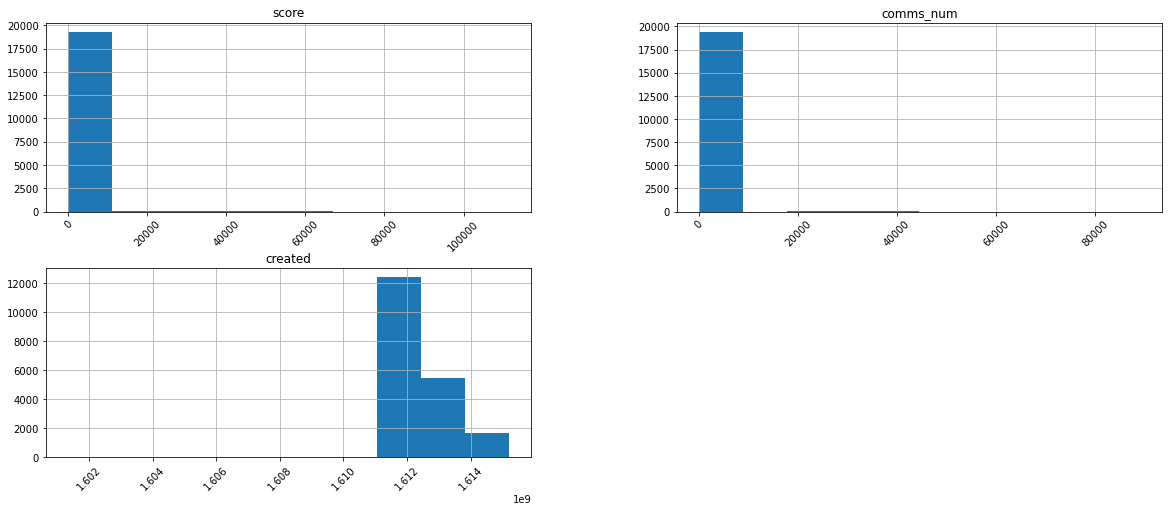

In [10]:
df.hist(figsize=(20, 8), xrot=45)

## Missing values

In [240]:
df.isnull()

,title,score,id,url,comms_num,created,body,timestamp
2,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
39325,False,False,False,False,False,False,False,False
39327,False,False,False,False,False,False,False,False
39328,False,False,False,False,False,False,False,False
39329,False,False,False,False,False,False,False,False


In [241]:
df.isnull()*1

,title,score,id,url,comms_num,created,body,timestamp
2,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
39325,0,0,0,0,0,0,0,0
39327,0,0,0,0,0,0,0,0
39328,0,0,0,0,0,0,0,0
39329,0,0,0,0,0,0,0,0


In [242]:
df.isnull().sum()

title        0
score        0
id           0
url          0
comms_num    0
created      0
body         0
timestamp    0
dtype: int64

In [243]:
missing_count = df.isnull().sum() # 결측치 개수
missing_percent = missing_count/len(df)

In [244]:
missing_percent

title        0.0
score        0.0
id           0.0
url          0.0
comms_num    0.0
created      0.0
body         0.0
timestamp    0.0
dtype: float64

In [245]:
type(missing_percent)

pandas.core.series.Series

In [246]:
pd.DataFrame(missing_percent)

,0
title,0.0
score,0.0
id,0.0
url,0.0
comms_num,0.0
created,0.0
body,0.0
timestamp,0.0


In [247]:
pd.DataFrame({'count' : missing_count, 'percent': missing_percent})
missing_df = pd.DataFrame({'count' : missing_count, 'percent': missing_percent})

,count,percent
title,0,0.0
score,0,0.0
id,0,0.0
url,0,0.0
comms_num,0,0.0
created,0,0.0
body,0,0.0
timestamp,0,0.0


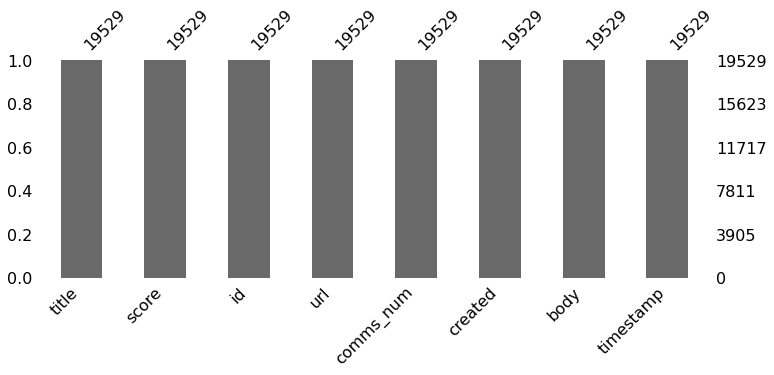

In [253]:
import missingno as msn
msn.bar(df, figsize=(12,4))

# 2. Feature Engineering

In [67]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10


## title --> title_lenght

In [68]:
len

<function len(obj, /)>

In [73]:
df['title'][2]

'Exit the system'

In [74]:
df['title'][2]
len(df['title'][2])

'Exit the system'

15

In [75]:
df['title'].apply(len)

2         15
6         43
7         18
10        61
12       101
        ... 
39637    296
39645     47
39647     64
39652     71
39660     36
Name: title, Length: 19613, dtype: int64

## body --> with_body
body 컬럼에 결측치가 많아 결측치 데이터를 버리지 않고 결측치 우무에 따라 'Yes', 'No' 범주형자료(categorical type data) 변경

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 2 to 39660
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      19613 non-null  object 
 1   score      19613 non-null  int64  
 2   id         19613 non-null  object 
 3   url        19613 non-null  object 
 4   comms_num  19613 non-null  int64  
 5   created    19613 non-null  float64
 6   body       19613 non-null  object 
 7   timestamp  19613 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.0+ MB


In [77]:
df['body'].isnull()

2        False
6        False
7        False
10       False
12       False
         ...  
39637    False
39645    False
39647    False
39652    False
39660    False
Name: body, Length: 19613, dtype: bool

In [78]:
np.where(df['body'].isnull())
np.where(df['body'].notnull())

(array([], dtype=int64),)

(array([    0,     1,     2, ..., 19610, 19611, 19612], dtype=int64),)

In [79]:
np.where(df['body'].isnull(), 'Yes', 'No')
df['with_body'] = np.where(df['body'].isnull(), 'Yes', 'No')
df.head()

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

,title,score,id,url,comms_num,created,body,timestamp,with_body
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,No
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,No
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,No
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,No
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,No


## timestamp --> month

In [80]:
df['timestamp']
df['timestamp'].dtype
type(df['timestamp'])

2        2021-01-28 21:30:35
6        2021-01-28 21:26:27
7        2021-01-28 21:19:31
10       2021-01-28 21:18:25
12       2021-01-28 21:17:10
                ...         
39637    2021-03-06 05:38:41
39645    2021-03-06 05:27:30
39647    2021-03-06 05:16:45
39652    2021-03-06 05:04:44
39660    2021-03-06 04:29:59
Name: timestamp, Length: 19613, dtype: object

dtype('O')

pandas.core.series.Series

In [81]:
pd.to_datetime(df['timestamp'])
pd.to_datetime(df['timestamp']).dtype
type(pd.to_datetime(df['timestamp']))

2       2021-01-28 21:30:35
6       2021-01-28 21:26:27
7       2021-01-28 21:19:31
10      2021-01-28 21:18:25
12      2021-01-28 21:17:10
                ...        
39637   2021-03-06 05:38:41
39645   2021-03-06 05:27:30
39647   2021-03-06 05:16:45
39652   2021-03-06 05:04:44
39660   2021-03-06 04:29:59
Name: timestamp, Length: 19613, dtype: datetime64[ns]

dtype('<M8[ns]')

pandas.core.series.Series

In [82]:
pd.to_datetime(df['timestamp']).dt.month
pd.to_datetime(df['timestamp']).dt.month.unique() # 1,2,9,3월만 존재

2        1
6        1
7        1
10       1
12       1
        ..
39637    3
39645    3
39647    3
39652    3
39660    3
Name: timestamp, Length: 19613, dtype: int64

array([1, 2, 9, 3], dtype=int64)

In [83]:
pd.to_datetime(df['timestamp']).dt.month.apply(str)

2        1
6        1
7        1
10       1
12       1
        ..
39637    3
39645    3
39647    3
39652    3
39660    3
Name: timestamp, Length: 19613, dtype: object

In [84]:
df['month'] = pd.to_datetime(df['timestamp']).dt.month.apply(str)

In [85]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp,with_body,month
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,No,1
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,No,1
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,No,1
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,No,1
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,No,1


In [86]:
df.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp', 'with_body', 'month'],
      dtype='object')

In [87]:
df.drop(['title', 'id', 'url', 'body'], axis=1)

,score,comms_num,created,timestamp,with_body,month
2,0,47,1.611862e+09,2021-01-28 21:30:35,No,1
6,317,53,1.611862e+09,2021-01-28 21:26:27,No,1
7,405,178,1.611862e+09,2021-01-28 21:19:31,No,1
10,222,70,1.611862e+09,2021-01-28 21:18:25,No,1
12,0,16,1.611861e+09,2021-01-28 21:17:10,No,1
...,...,...,...,...,...,...
39637,75,44,1.615002e+09,2021-03-06 05:38:41,No,3
39645,305,133,1.615001e+09,2021-03-06 05:27:30,No,3
39647,13,13,1.615001e+09,2021-03-06 05:16:45,No,3
39652,93,27,1.615000e+09,2021-03-06 05:04:44,No,3


In [88]:
df = df.drop(['title', 'id', 'url', 'body'], axis=1) #  df.drop(['title', 'id', 'url', 'body'], axis=1, inplace=True)

# 3. Data visualization

In [89]:
df.dtypes
df.columns

score          int64
comms_num      int64
created      float64
timestamp     object
with_body     object
month         object
dtype: object

Index(['score', 'comms_num', 'created', 'timestamp', 'with_body', 'month'], dtype='object')

# Univariates
## Numeric columns

<AxesSubplot:ylabel='Frequency'>

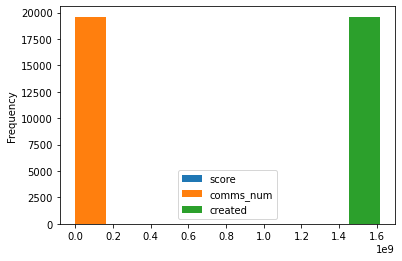

In [90]:
df[['score', 'comms_num', 'created']].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

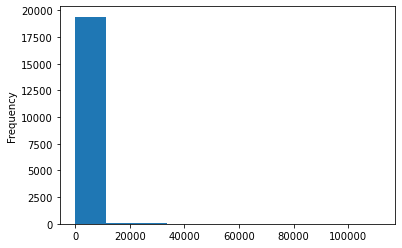

<AxesSubplot:ylabel='Frequency'>

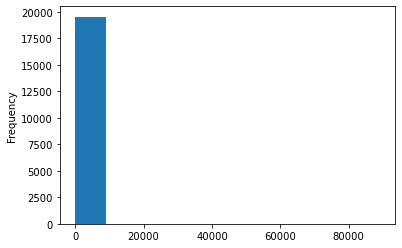

<AxesSubplot:ylabel='Frequency'>

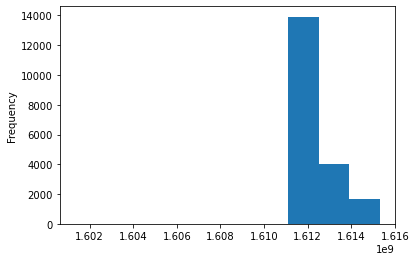

In [91]:
for i in ['score', 'comms_num', 'created']:
    df[i].plot(kind='hist'); plt.show()

## Categorical columns

In [92]:
df.columns

Index(['score', 'comms_num', 'created', 'timestamp', 'with_body', 'month'], dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 2 to 39660
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   score      19613 non-null  int64  
 1   comms_num  19613 non-null  int64  
 2   created    19613 non-null  float64
 3   timestamp  19613 non-null  object 
 4   with_body  19613 non-null  object 
 5   month      19613 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ MB


<AxesSubplot:>

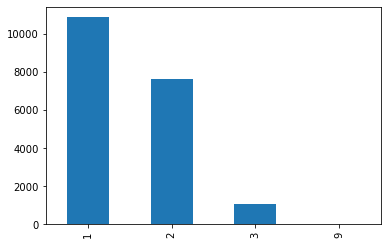

In [94]:
df['month'].value_counts().plot(kind='bar')

# Multivariates
## Numerical vs. Numerical --> heat map/pairplot

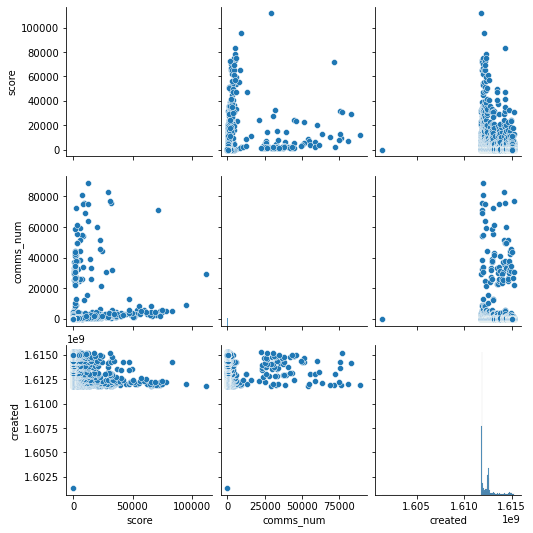

In [95]:
import seaborn as sns
sns.pairplot(df[['score', 'comms_num', 'created']])

<AxesSubplot:>

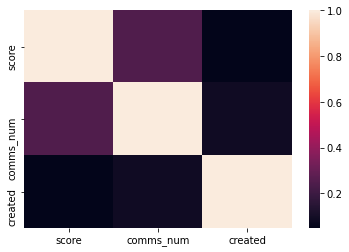

In [96]:
sns.heatmap(data= df[['score', 'comms_num', 'created']].corr())

## Categorica vs. Categorical  --> countplot with hue

In [97]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 2 to 39660
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   score      19613 non-null  int64  
 1   comms_num  19613 non-null  int64  
 2   created    19613 non-null  float64
 3   timestamp  19613 non-null  object 
 4   with_body  19613 non-null  object 
 5   month      19613 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ MB


score         1786
comms_num      947
created      15391
timestamp    15391
with_body        1
month            4
dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

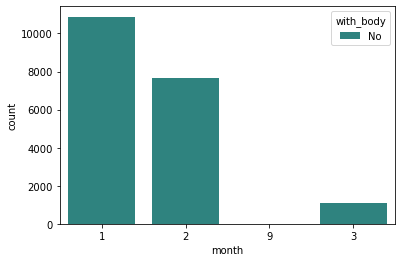

In [98]:
sns.countplot(x='month',hue='with_body',data=df ,palette='viridis')

## Categorica vs. Numerical  --> boxplo/pairplot with hue

In [99]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           100 non-null    int64  
 1   Restaurant     100 non-null    object 
 2   Sales          100 non-null    float64
 3   Average Check  100 non-null    int64  
 4   City           100 non-null    object 
 5   State          100 non-null    object 
 6   Meals Served   100 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


<Figure size 2500x400 with 0 Axes>

[Text(0, 0, 'New York'),
 Text(1, 0, 'Orlando '),
 Text(2, 0, 'Washington'),
 Text(3, 0, 'Chicago'),
 Text(4, 0, 'Las Vegas'),
 Text(5, 0, 'Raleigh'),
 Text(6, 0, 'Miami Beach'),
 Text(7, 0, 'Miami'),
 Text(8, 0, 'Indianapolis'),
 Text(9, 0, 'Oak Brook'),
 Text(10, 0, 'Houston'),
 Text(11, 0, 'Philadelphia'),
 Text(12, 0, 'Wheeling'),
 Text(13, 0, 'Ft. Lauderdale'),
 Text(14, 0, 'Los Angeles'),
 Text(15, 0, 'Rosemont'),
 Text(16, 0, 'Bal Harbour'),
 Text(17, 0, 'Daly City'),
 Text(18, 0, 'Atlanta'),
 Text(19, 0, 'Coalinga'),
 Text(20, 0, 'Frankenmuth'),
 Text(21, 0, 'Boston'),
 Text(22, 0, 'Portland'),
 Text(23, 0, 'Cape May'),
 Text(24, 0, 'San Francisco'),
 Text(25, 0, 'Fort Lauderdale'),
 Text(26, 0, 'Nashville'),
 Text(27, 0, 'Burbank'),
 Text(28, 0, 'Austin'),
 Text(29, 0, 'Denver'),
 Text(30, 0, 'Atlantic City'),
 Text(31, 0, 'Malibu'),
 Text(32, 0, 'West Hollywood'),
 Text(33, 0, 'McLean'),
 Text(34, 0, 'Amarillo'),
 Text(35, 0, 'La Jolla')]

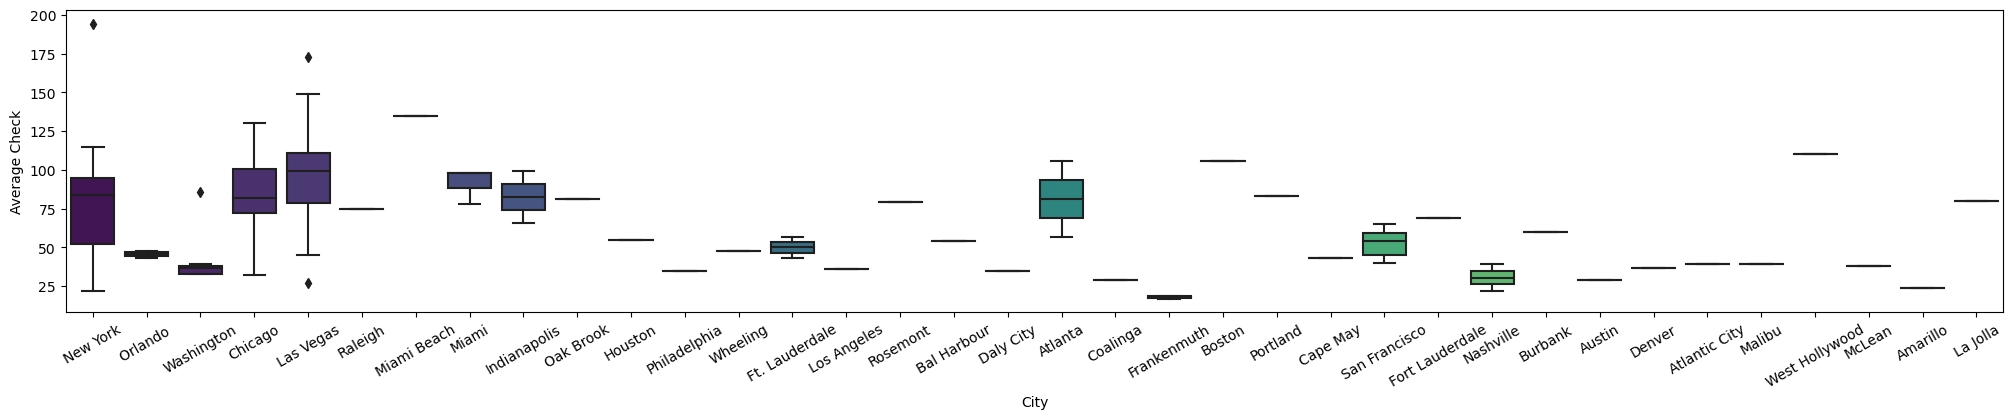

In [100]:
plt.figure(figsize=(25,4), dpi=100)
ax = sns.boxplot(x='City', y = 'Average Check', data=tf ,palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [101]:
df.columns

Index(['score', 'comms_num', 'created', 'timestamp', 'with_body', 'month'], dtype='object')

In [102]:
import warnings
warnings.filterwarnings('ignore')  #버젼이 다른데 따른 에러는 나타내지 말기
plt.rcParams['font.family']='Malgun Gothic'# 그림에 한글이 깨지지 않게 표시

Text(0.5, 1.0, 'Pair Plot, Hue로 월을 시각화')

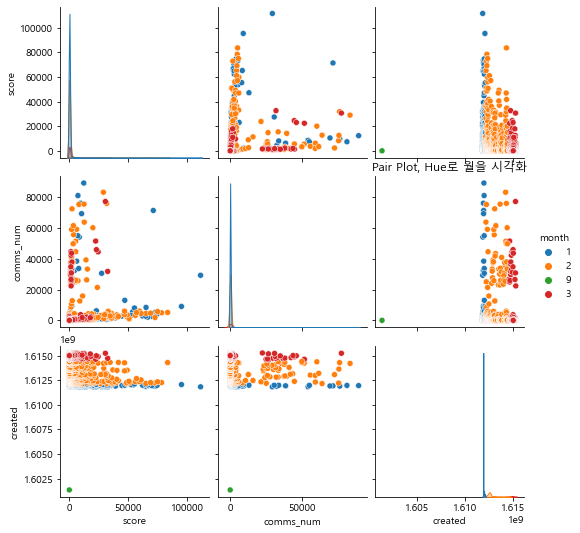

In [103]:
sns.pairplot(df[['score', 'comms_num', 'created','month']], hue='month')

plt.title("Pair Plot, Hue로 월을 시각화")
plt.show()

# End